In [1]:
"""play a game and see it on terminal"""
from IPython.display import clear_output
from constants import run_params, env_params, agent_params, agents, num_episodes
from run import complete_run
import viz
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
run_params["num_runs"] = 50
dico = complete_run(env_params, run_params, agents, agent_params)
clear_output()

In [3]:
state_actions  = dico['state_actions']
state_visits  = dico['state_visits']
rewards_continuous  = dico['rewards_continuous']
rewards_room_by_room  = dico['rewards_room_by_room']
value_last_episode  = dico['value_last_episode']

In `run.py` we defined these arrays as :
```python
    state_actions = np.zeros(
        (len(agents), num_runs, num_rooms, num_episodes, *tuple_state, num_actions)
    )
    rewards_continuous = np.zeros((len(agents), num_runs, num_episodes * num_rooms))
    rewards_room_by_room = np.zeros((len(agents), num_runs, num_rooms, num_episodes))
    value_last_episode = np.zeros((len(agents), num_runs, num_rooms, *tuple_state, num_actions))
    ...
    state_visits = state_actions.sum(axis=-1)
```

This must be reminded whenever we access an element in these arrays

For example, `value_last_episode[0,0,6]` means that I want to get the value estimation from the first agent (Q-Learning), at the first run (I could have done a mean too), and in the 7th room.

Similarily, `rewards_continuous[1,3,151]` means that I want the reward the second agent (expected sarsa) received at the 4th run after the 152th episode, **when we consider that the number of episodes does not reset after each room** (see its definition for more details). This means that if there are 50 runs per room, then the 152th episode is the 2nd episode of room number 4.

If we want the reward by room, we can split this array, or preferably use `rewards_room_by_room`

In [4]:
viz_params = {
    "save": True,
    "show": False,
    "save_directory": Path("viz"),
    "cmap": "magma",
    "max_fontsize": 40,
    "block_show": True,
}
viz_params["save_directory"].mkdir(exist_ok=True)

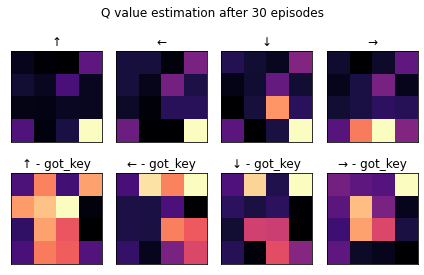

In [5]:
viz.plot_q_value_estimation(value_last_episode[0,0,6], num_episodes, **viz_params)

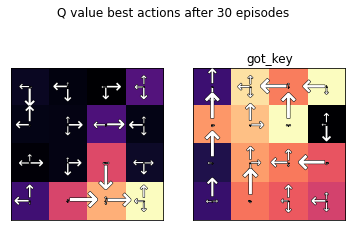

In [6]:
viz.plot_best_action_per_state(value_last_episode[0,0,6],num_episodes, **viz_params)

'10 last episode visits out of 30 runs'

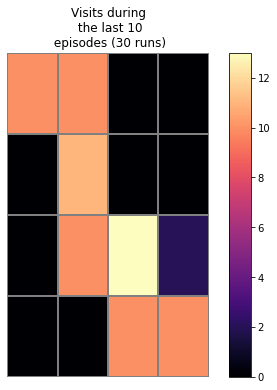

In [7]:
viz.plot_n_extreme_visits(state_visits[0,0,6,-10:], num_episodes, **viz_params)

In [26]:
@viz.save_and_show()
def plot_full_reward(all_rewards, **viz_args):
    fig, ax = plt.subplots()
    for agent_name, agent_rewards in zip(agents.keys(), all_rewards):
        plt.plot(agent_rewards, label=agent_name)
    figtitle = f"Reward for agents {', '.join(agents.keys())}"
    plt.title(figtitle)
    nb_rooms = all_rewards.shape[1] // num_episodes
    ax.vlines(range(0, all_rewards.shape[1], num_episodes), 0, 12, colors="g", label = "changing room")
    plt.ylim(0, 12)
    plt.tight_layout()
    plt.legend()
    return figtitle

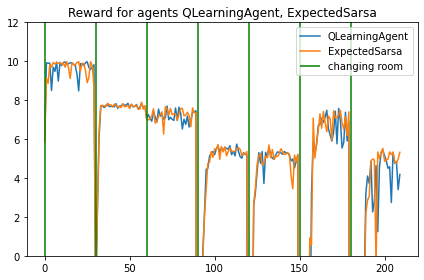

In [27]:
avg_reward = rewards_continuous.mean(axis=1) # average over multiple runs
plot_full_reward(avg_reward, **viz_params)